# Linear Regression
- So we're using `sklearn` to get some pre-built machine learning models.
- This is very convenient. The one that I'm using here is the linear regression model.
- Linear regression is super cool, the general idea is that we can use statistics to create a line of best fit, and new data should simply be placed on that line.
- The downsides to this are:
    1. Overfitting (results can learn training data too well)
    2. Underfitting (connections in the data can be lost due to the simple nature of the algorithm)
    3. Assumes linearity (doesn't work for a lot of datasets)
- The benefits to this are:
    1. Speed (linear regression is simple and fast)
- It's a tool that fits a specific use-case.
- In stats, we see linear regression with the following equation: $$Y_i=\beta_0+\beta_1X_i+\epsilon_i$$
- Essentially, $Y_i$ is the dependent variable, $\beta_0$ is our population $Y$-intercept, $\beta_1$ is the population slope coefficient, and $\epsilon_i$ is the random error coefficient.
    - $\beta$ values are all effected by all other pieces of data. The population slope, $Y$-intercept, etc. all change as the population changes.
- For ML purposes, we're using the exact same concept. But for our purposes, we don't really care a lot about things like the random error variable. We just need to make predictions. The formulas to know here are: $$Y=a+bX$$ $$a=\frac{(\sum y)(\sum x^2) - (\sum x)(\sum xy)}{n(\sum x^2)-(\sum x)^2}$$ $$b=\frac{n\sum xy - (\sum x)(\sum y)}{n\sum x^2 - (\sum x)^2}$$
- In this scenario, $a$ is our population $Y$-intercpet and $b$ is our population slope coefficient. $x$ and $y$ are the full datasets for $x$ and $y$. So something like $\sum x^2$ is the sum of the squares of all elements in the $x$ dataset.

In [21]:
from sklearn.linear_model import LinearRegression 

import matplotlib.pyplot as plt
import numpy as np

import datasets.linear
import datasets.poly
import datasets.trig

### Imports
- The imports are very simple for this.
    1. `sklearn.linear_model` is just the algorithm that is being used from scikit-learn
    2. `matplotlib.pyplot` is the plotting library that will be used to show results
    3. `numpy` is used for some computations
    4. `datasets.*` is the small collection of programs I made to create random datasets

In [22]:
linear_data = datasets.linear.gen_data(0, 100)
linearvar_data = datasets.linear.gen_data(0, 100, 0.5)

poly_data = datasets.poly.gen_data(0, 100)
polyvar_data = datasets.poly.gen_data(0, 100, 0.5)

trig_data = datasets.trig.gen_data(0, 100)
trigvar_data = datasets.trig.gen_data(0, 100, 0.5)

featureset = np.array([np.array([i]) for i in np.arange(0, 200, 3.67)])
predictions = np.empty(0)

-5X + 4
-2X + 4
-3X^4 + -4X^3 + -4X^2 + -2X + 4
0X^4 + -3X^3 + 3X^2 + 3X + -4
1sin(X) + 2cos(X)
-5sin(X) + 4cos(X)


### Datasets
- All datasets are created for $0\le X\le 100$.
- The `linearvar_data`, `polyvar_data`, and `trigvar_data` all have some variance. 
    - Essentially, rather than a clean outline of a linear, polynomial, or trigonometric function, each $Y$ term is muddled by a random error term. 
    - If the value provided for variance is $n$, then $-n\le\epsilon\le n$
        - Linear: $n=10$
        - Polynomial: $n=10000000$ (required for scale)
        - Trigonometric: $n=10$
- Each dataset is formatted as follows:
```python
{
    'X': [...],
    'Y': [...]
}
```
- `X_predictions` is a numpy array that stores floating point values that will be predicted by the model. The corresponding predictions will go into `Y_predictions` and be plotted.

In [ ]:
def train_and_plot(model: LinearRegression, dataset: dict, featureset: np.array) -> np.ndarray:
    model.fit(dataset['X'], dataset['Y'])
    
    predictions = model.predict(featureset)
    
    ax = plt.gca()

    xlim = featureset[-1]
    ax.set_xlim(-xlim, xlim)
    
    ylim1 = abs(max(predictions))
    ylim2 = abs(min(predictions))
    if (ylim1 > ylim2):
        ax.set_ylim(-ylim1, ylim1)
    else:
        ax.set_ylim(-ylim2, ylim2)

    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    
    ax.scatter(dataset['X'], dataset['Y'], c='blue')
    ax.scatter(featureset, predictions, c='red', s=10)
    ax.legend(['Training Data', 'Predicted Data'])
    
    plt.show()
    
    return predictions


### Training
- The `train_and_plot` function trains data, makes predictions, and plots results.
- It starts by calling `model.fit()` to train the model.
- After this, it predicts a $Y$ value for each given $X$ value.
- Finally, it plots everything with training data in blue and predicted data in red.

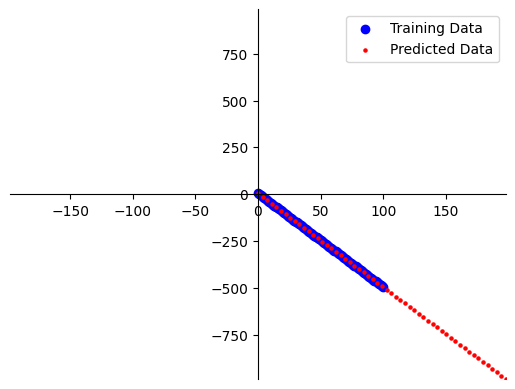

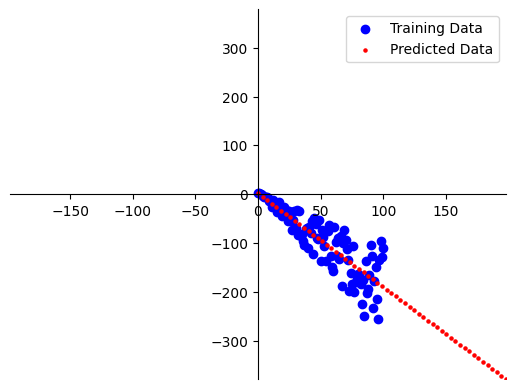

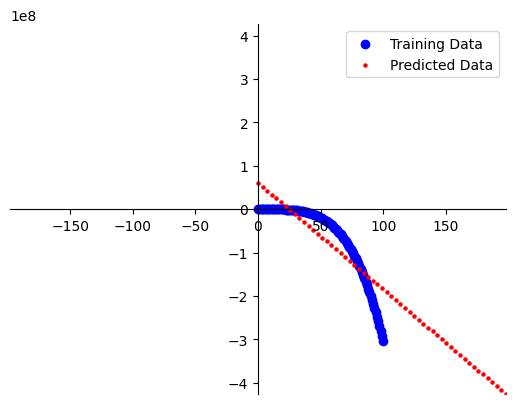

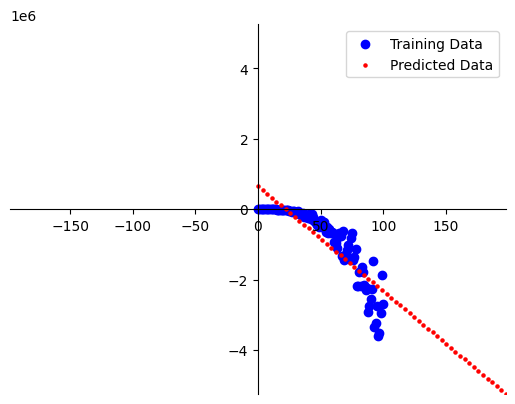

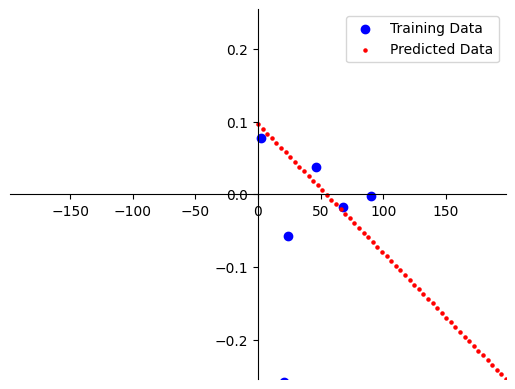

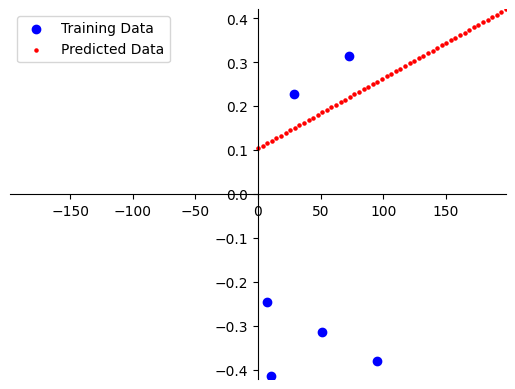

array([0.10406178, 0.10992569, 0.1157896 , 0.12165352, 0.12751743,
       0.13338134, 0.13924526, 0.14510917, 0.15097309, 0.156837  ,
       0.16270091, 0.16856483, 0.17442874, 0.18029265, 0.18615657,
       0.19202048, 0.19788439, 0.20374831, 0.20961222, 0.21547613,
       0.22134005, 0.22720396, 0.23306787, 0.23893179, 0.2447957 ,
       0.25065961, 0.25652353, 0.26238744, 0.26825135, 0.27411527,
       0.27997918, 0.28584309, 0.29170701, 0.29757092, 0.30343483,
       0.30929875, 0.31516266, 0.32102657, 0.32689049, 0.3327544 ,
       0.33861831, 0.34448223, 0.35034614, 0.35621005, 0.36207397,
       0.36793788, 0.37380179, 0.37966571, 0.38552962, 0.39139354,
       0.39725745, 0.40312136, 0.40898528, 0.41484919, 0.4207131 ])

In [24]:
train_and_plot(LinearRegression(), linear_data, featureset)
train_and_plot(LinearRegression(), linearvar_data, featureset)

train_and_plot(LinearRegression(), poly_data, featureset)
train_and_plot(LinearRegression(), polyvar_data, featureset)

train_and_plot(LinearRegression(), trig_data, featureset)
train_and_plot(LinearRegression(), trigvar_data, featureset)

### Results
- The model performed best on linear datasets
    - This makes sense, as it's the data that this algorithm is built for
- Performance on polynomial datasets was *alright* all things considered, but definitely not great
    - This makes sense as well, polynomial datasets (especially even polynomials) can have somewhat decent estimates on particular intervals using linear functions
- Finally, trigonometric datasets performed the worst
    - This makes perfect sense, as this data is just about as close as we can get to looking like noise while still keeping the reasonable expectation of being able to predict new values with other models.
    - Since for each value at a positive point, there is another value at a negative point, the model (rather predictably) shows that this must be a very messy $Y=0+\epsilon$.
- All of these results are expected and easily understood